<a href="https://colab.research.google.com/github/ranjithkumartammineni/plantgrowthclassification/blob/main/Plant_Growth_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
from scipy.stats import boxcox
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('/content/Plant growth.csv')
data=df.copy()

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Temperature,193.0,25.076087,5.354170,15.200000,20.637096,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


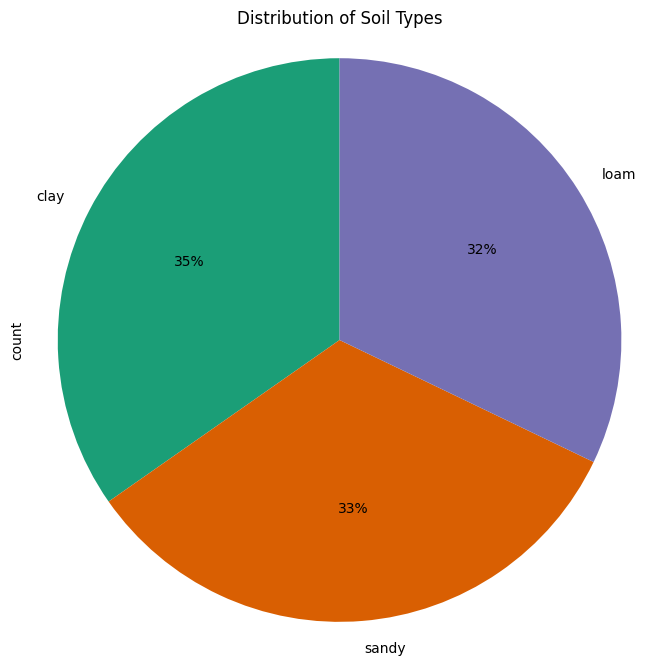

In [ ]:
# Getting the counts of each different type of soil
soil_type_counts = df['Soil_Type'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

soil_type_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',  # For percentage
    startangle=90,      # For better view
    colors=plt.get_cmap('Dark2').colors  # For Colors
)


ax.set_title('Distribution of Soil Types')


ax.axis('equal')

# Show the plot
plt.show()


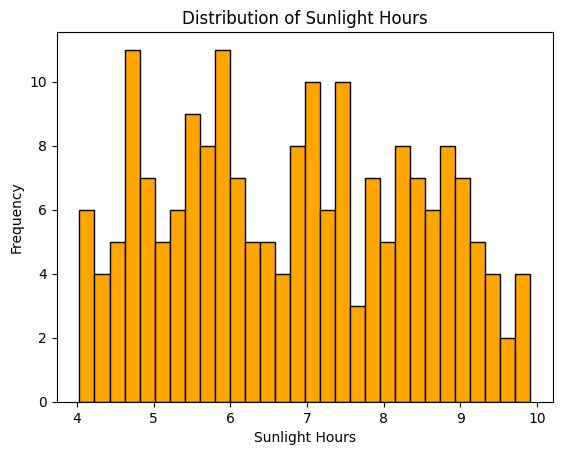

In [ ]:
plt.hist(df['Sunlight_Hours'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sunlight Hours')
plt.xlabel('Sunlight Hours')
plt.ylabel('Frequency')
plt.show()

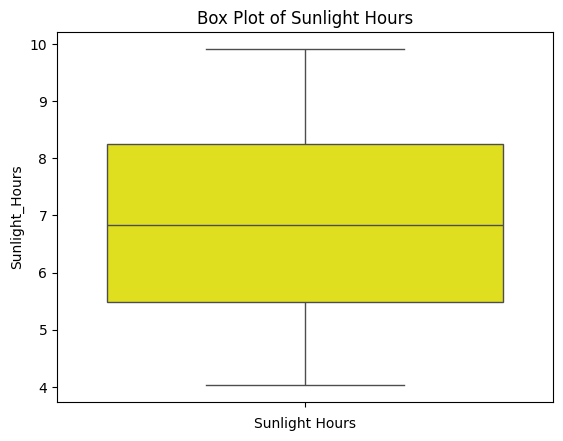

In [ ]:
sns.boxplot(df['Sunlight_Hours'], color='yellow')
plt.title('Box Plot of Sunlight Hours')
plt.xlabel('Sunlight Hours')
plt.show()

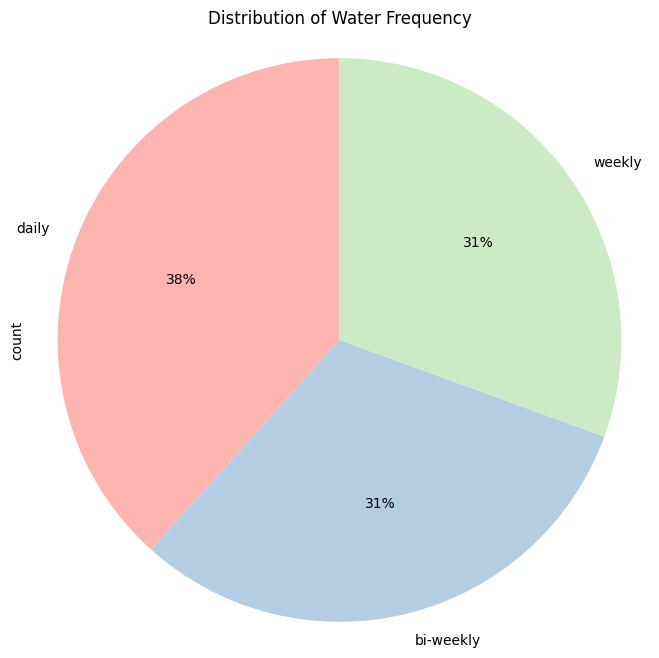

In [ ]:
# Getting the counts of each different Watering Frequencies
Water_Frequency_counts = df['Water_Frequency'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

Water_Frequency_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',  # For percentage
    startangle=90,      # For better view
    colors=plt.get_cmap('Pastel1').colors  # For Colors
)


ax.set_title('Distribution of Water Frequency')


ax.axis('equal')

# Show the plot
plt.show()

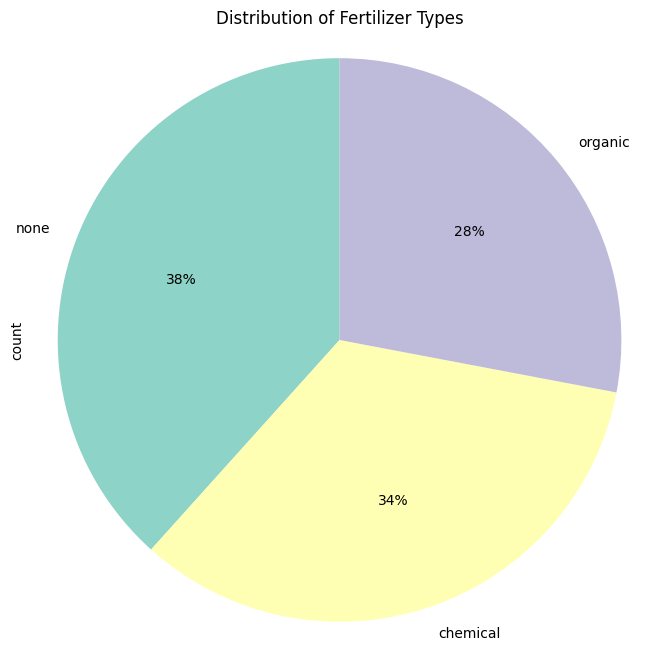

In [ ]:
# Getting the counts of each different Fertilizer types
Fertilizer_Type_counts = df['Fertilizer_Type'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

Fertilizer_Type_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',  # For percentage
    startangle=90,      # For better view
    colors=plt.get_cmap('Set3').colors  # For Colors
)


ax.set_title('Distribution of Fertilizer Types')


ax.axis('equal')

# Show the plot
plt.show()

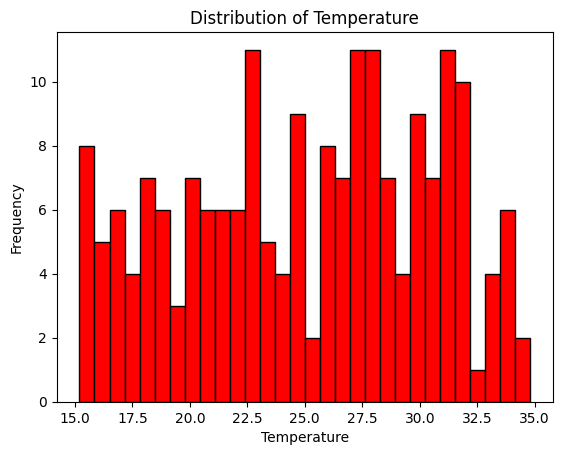

In [ ]:
plt.hist(df['Temperature'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

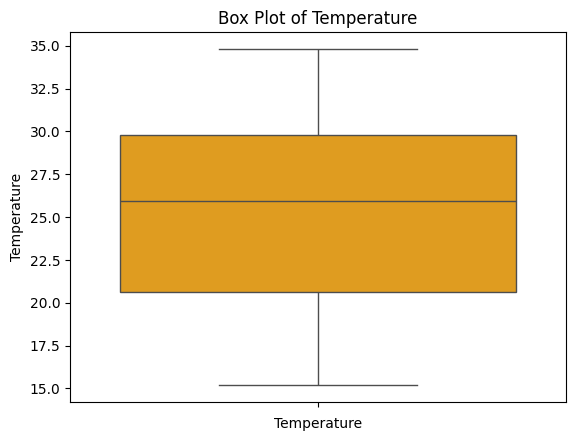

In [ ]:
sns.boxplot(df['Temperature'], color='orange')
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

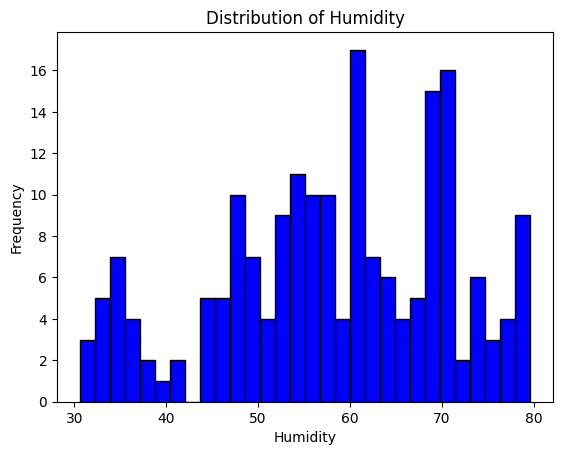

In [ ]:
plt.hist(df['Humidity'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

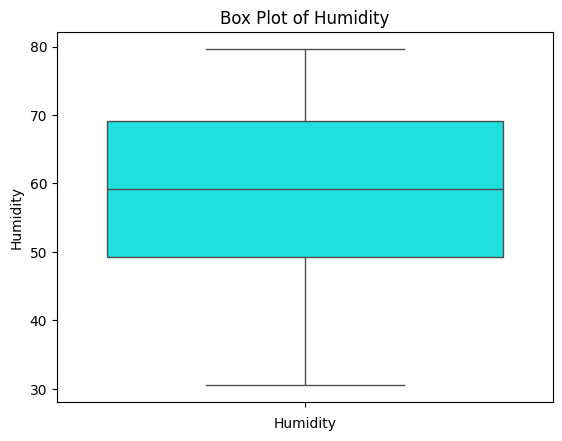

In [ ]:
sns.boxplot(df['Humidity'], color='cyan')
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.show()

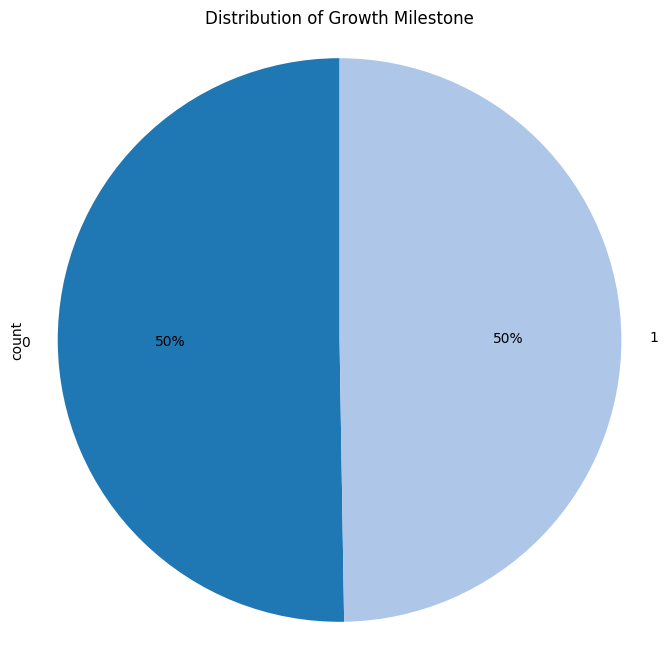

In [ ]:
# Getting the counts of each different Growth Milestone types
Growth_Milestone_counts = df['Growth_Milestone'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

Growth_Milestone_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',  # For percentage
    startangle=90,      # For better view
    colors=plt.get_cmap('tab20').colors  # For Colors
)


ax.set_title('Distribution of Growth Milestone')


ax.axis('equal')

# Show the plot
plt.show()

In [ ]:
cross_table = pd.crosstab(df['Soil_Type'], df['Fertilizer_Type'])
print(cross_table)

Fertilizer_Type  chemical  none  organic
Soil_Type                               
clay                   25    24       18
loam                   17    24       21
sandy                  23    26       15


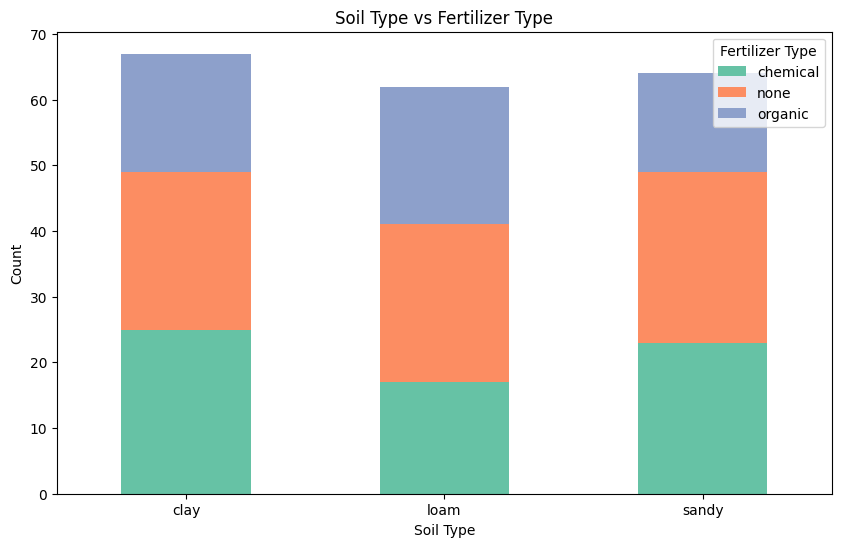

In [ ]:
# Stacked bar chart for Cross-tabulation
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Soil Type vs Fertilizer Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fertilizer Type')
plt.show()

In [ ]:
cross_table2 = pd.crosstab(df['Soil_Type'], df['Water_Frequency'])
print(cross_table2)

Water_Frequency  bi-weekly  daily  weekly
Soil_Type                                
clay                    18     19      30
loam                    28     20      14
sandy                   14     35      15


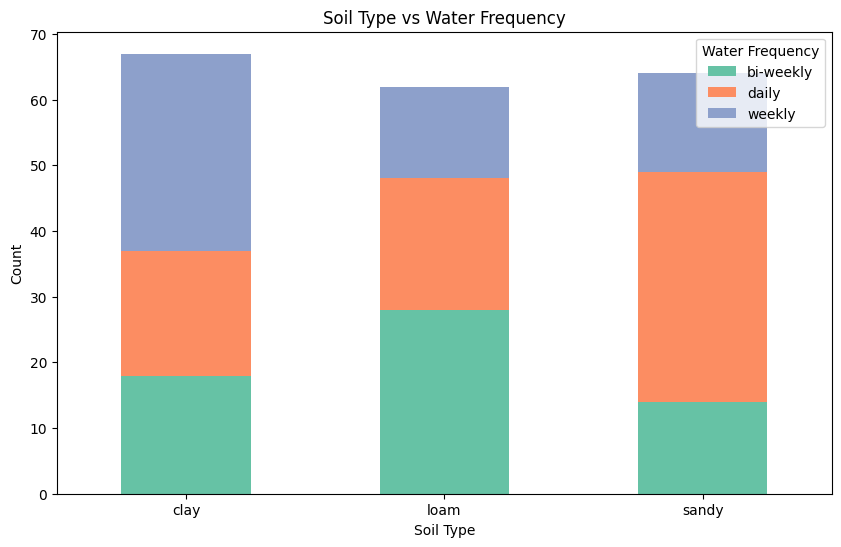

In [ ]:
# Stacked bar chart for Cross-tabulation
cross_table2.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Soil Type vs Water Frequency')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Water Frequency')
plt.show()

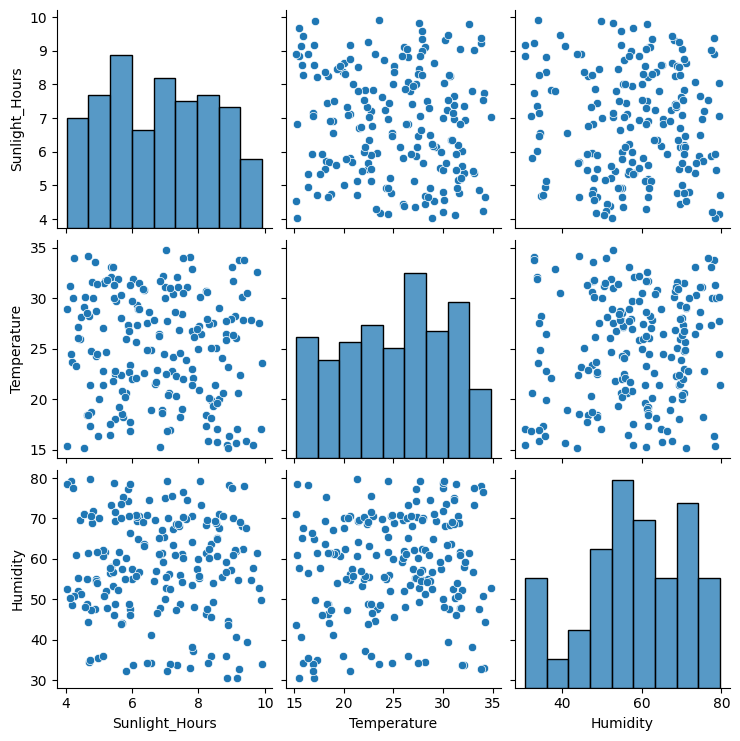

In [ ]:
sns.pairplot(df, vars=['Sunlight_Hours', 'Temperature', 'Humidity'])
plt.show()

In [ ]:
X = df.drop('Growth_Milestone', axis=1)
y = df['Growth_Milestone']

In [ ]:
# Label encoding for categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [ ]:
numerical_features = X.select_dtypes(include=['float64'])
anova_f_values, anova_p_values = f_classif(numerical_features, y)

anova_results = pd.DataFrame({
    'Feature': numerical_features.columns,
    'F-Value': anova_f_values,
    'p-Value': anova_p_values
})
print("ANOVA Results for Numerical Features:")
print(anova_results)

ANOVA Results for Numerical Features:
          Feature   F-Value   p-Value
0  Sunlight_Hours  2.895978  0.090428
1     Temperature  0.549833  0.459297
2        Humidity  3.300261  0.070836


In [ ]:
categorical_features = X.select_dtypes(include='int64')
chi2_values, chi2_p_values = chi2(categorical_features, y)

chi2_results = pd.DataFrame({
    'Feature': categorical_features.columns,
    'Chi2-Value': chi2_values,
    'p-Value': chi2_p_values
})
print("CHISQUARE Results for Categorical Features:")
print(chi2_results)

CHISQUARE Results for Categorical Features:
           Feature  Chi2-Value   p-Value
0        Soil_Type    0.130766  0.717640
1  Water_Frequency    0.005155  0.942764
2  Fertilizer_Type    1.226920  0.268007


In [ ]:
# Mutual Information for all features
mutual_info_values = mutual_info_classif(X, y)

mutual_info_results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_values
})
print("\nMutual Information for All Features:")
print(mutual_info_results)


Mutual Information for All Features:
           Feature  Mutual Information
0        Soil_Type            0.021274
1   Sunlight_Hours            0.000000
2  Water_Frequency            0.000000
3  Fertilizer_Type            0.115748
4      Temperature            0.000000
5         Humidity            0.088390


In [ ]:
X=data.drop('Growth_Milestone',axis=1)
Y=data['Growth_Milestone']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=42)

In [ ]:
onehot_encoder = OneHotEncoder()

In [ ]:
X_train_encoded = onehot_encoder.fit_transform(X_train[['Soil_Type']]).toarray()

In [ ]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Soil_Type']))
X_train = X_train.drop('Soil_Type', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_train.head()

,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy
0,7.134000,bi-weekly,none,31.000000,52.600000,0.0,1.0,0.0
1,9.128000,weekly,organic,15.700000,40.600000,1.0,0.0,0.0
2,5.124000,daily,organic,27.100000,62.300000,0.0,0.0,1.0
3,4.717565,bi-weekly,chemical,17.321453,35.056134,1.0,0.0,0.0
4,7.793835,weekly,organic,21.400992,64.236559,0.0,0.0,1.0


In [ ]:
X_test_encoded = onehot_encoder.transform(X_test[['Soil_Type']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Soil_Type']))
X_test = X_test.drop('Soil_Type', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_test.head()

,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy
0,8.822032,bi-weekly,organic,26.509484,35.940896,0.0,1.0,0.0
1,5.612000,weekly,organic,19.200000,61.600000,0.0,0.0,1.0
2,7.016074,bi-weekly,organic,34.810103,52.782838,1.0,0.0,0.0
3,8.317000,weekly,none,27.500000,60.300000,1.0,0.0,0.0
4,6.356000,daily,none,30.800000,63.700000,0.0,0.0,1.0


In [ ]:
onehot_encoder = OneHotEncoder()

In [ ]:
X_train_encoded = onehot_encoder.fit_transform(X_train[['Water_Frequency']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Water_Frequency']))
X_train = X_train.drop('Water_Frequency', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_train.head()

,Sunlight_Hours,Fertilizer_Type,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly
0,7.134000,none,31.000000,52.600000,0.0,1.0,0.0,1.0,0.0,0.0
1,9.128000,organic,15.700000,40.600000,1.0,0.0,0.0,0.0,0.0,1.0
2,5.124000,organic,27.100000,62.300000,0.0,0.0,1.0,0.0,1.0,0.0
3,4.717565,chemical,17.321453,35.056134,1.0,0.0,0.0,1.0,0.0,0.0
4,7.793835,organic,21.400992,64.236559,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test_encoded = onehot_encoder.transform(X_test[['Water_Frequency']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Water_Frequency']))
X_test = X_test.drop('Water_Frequency', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_test.head()

,Sunlight_Hours,Fertilizer_Type,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly
0,8.822032,organic,26.509484,35.940896,0.0,1.0,0.0,1.0,0.0,0.0
1,5.612000,organic,19.200000,61.600000,0.0,0.0,1.0,0.0,0.0,1.0
2,7.016074,organic,34.810103,52.782838,1.0,0.0,0.0,1.0,0.0,0.0
3,8.317000,none,27.500000,60.300000,1.0,0.0,0.0,0.0,0.0,1.0
4,6.356000,none,30.800000,63.700000,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
onehot_encoder = OneHotEncoder()


In [ ]:
X_train_encoded = onehot_encoder.fit_transform(X_train[['Fertilizer_Type']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Fertilizer_Type']))
X_train = X_train.drop('Fertilizer_Type', axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_train.head()

,Sunlight_Hours,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,7.134000,31.000000,52.600000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,9.128000,15.700000,40.600000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,5.124000,27.100000,62.300000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.717565,17.321453,35.056134,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,7.793835,21.400992,64.236559,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test_encoded = onehot_encoder.transform(X_test[['Fertilizer_Type']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Fertilizer_Type']))
X_test = X_test.drop('Fertilizer_Type', axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
X_test.head()

,Sunlight_Hours,Temperature,Humidity,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,8.822032,26.509484,35.940896,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,5.612000,19.200000,61.600000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7.016074,34.810103,52.782838,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,8.317000,27.500000,60.300000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,6.356000,30.800000,63.700000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


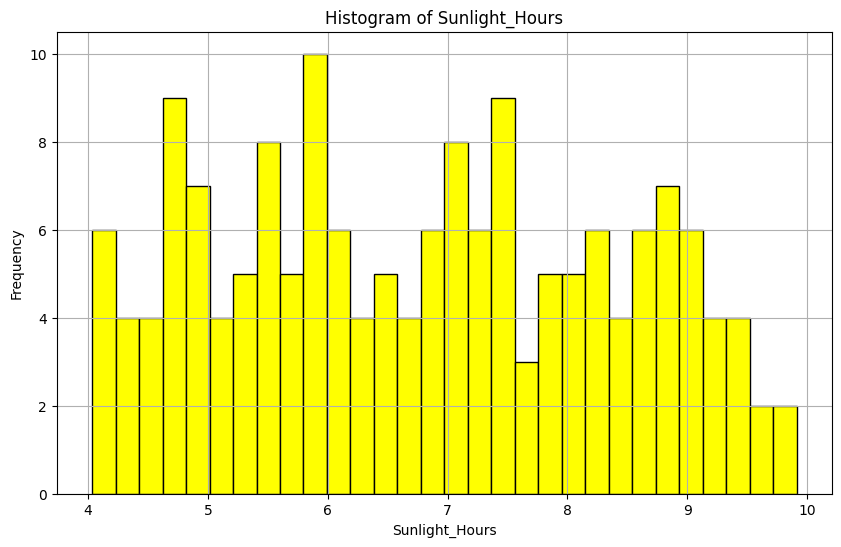

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train['Sunlight_Hours'], bins=30, color='yellow', edgecolor='black')
plt.xlabel("Sunlight_Hours")
plt.ylabel('Frequency')
plt.title('Histogram of ' + "Sunlight_Hours")
plt.grid(True)
plt.show()

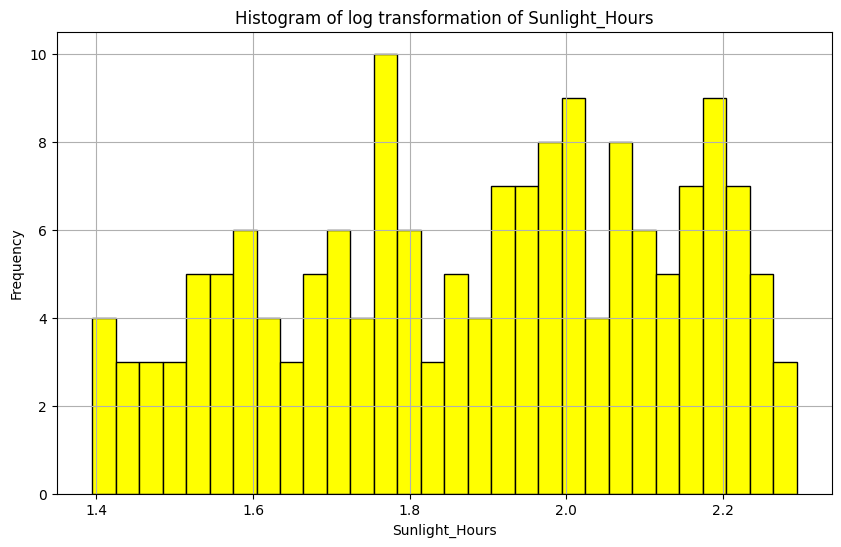

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(X_train['Sunlight_Hours']), bins=30, color='yellow', edgecolor='black')
plt.xlabel("Sunlight_Hours")
plt.ylabel('Frequency')
plt.title('Histogram of log transformation of ' + "Sunlight_Hours")
plt.grid(True)
plt.show()

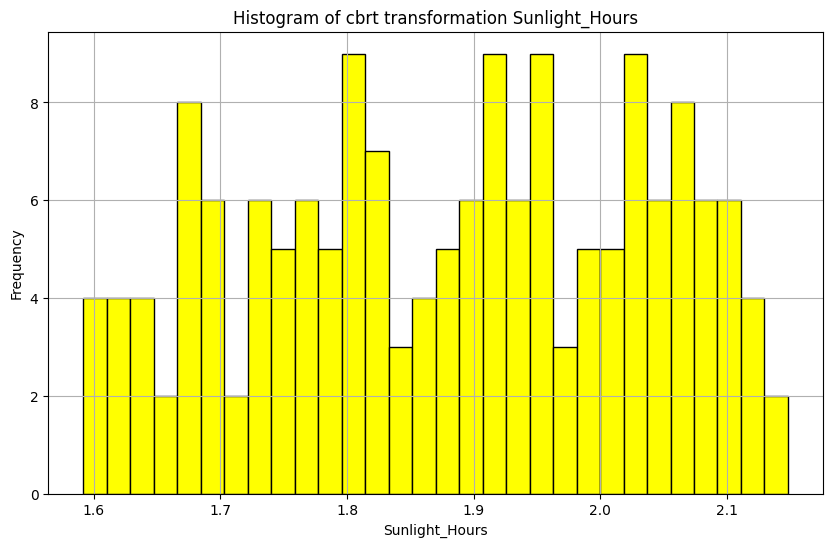

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.cbrt(X_train['Sunlight_Hours']), bins=30, color='yellow', edgecolor='black')
plt.xlabel("Sunlight_Hours")
plt.ylabel('Frequency')
plt.title('Histogram of cbrt transformation ' + "Sunlight_Hours")
plt.grid(True)
plt.show()

In [ ]:
X_train['Sunlight_Hours'] = np.log(X_train['Sunlight_Hours'])
X_test['Sunlight_Hours'] = np.log(X_test['Sunlight_Hours'])

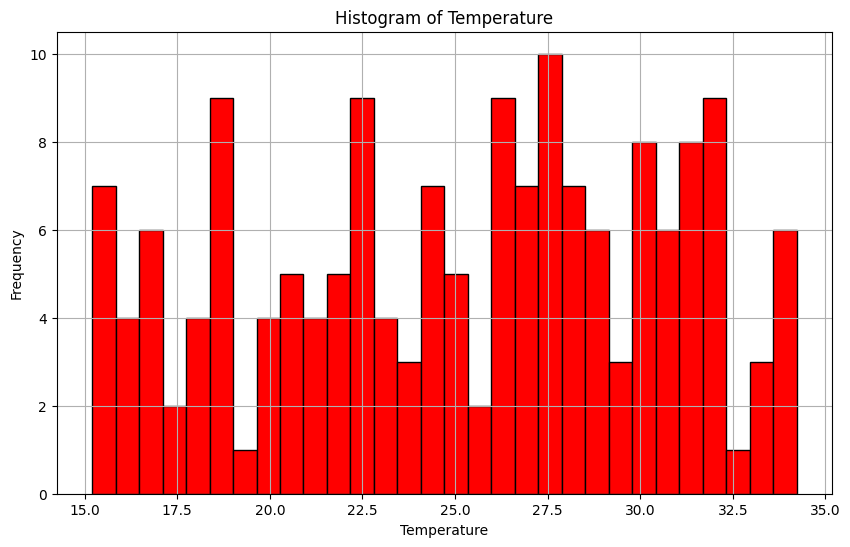

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train['Temperature'], bins=30, color='red', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.title('Histogram of ' + "Temperature")
plt.grid(True)
plt.show()

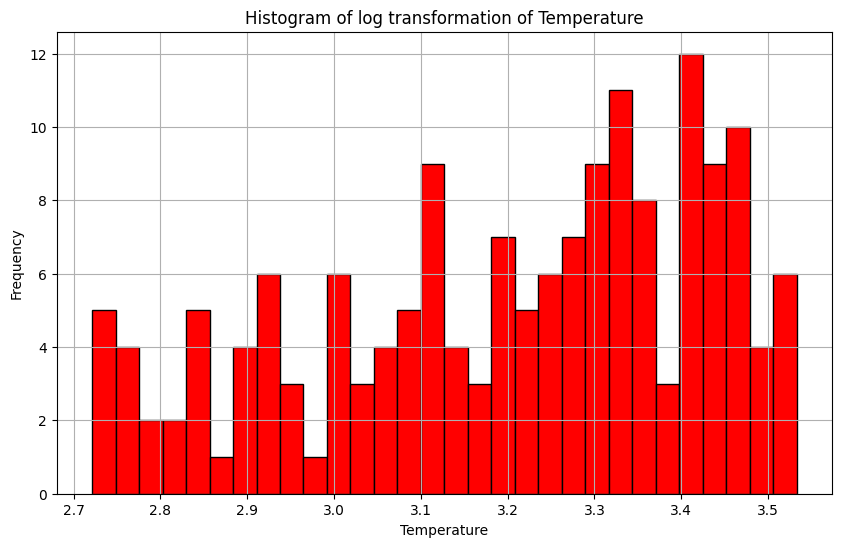

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(X_train['Temperature']), bins=30, color='red', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.title('Histogram of log transformation of ' + "Temperature")
plt.grid(True)
plt.show()

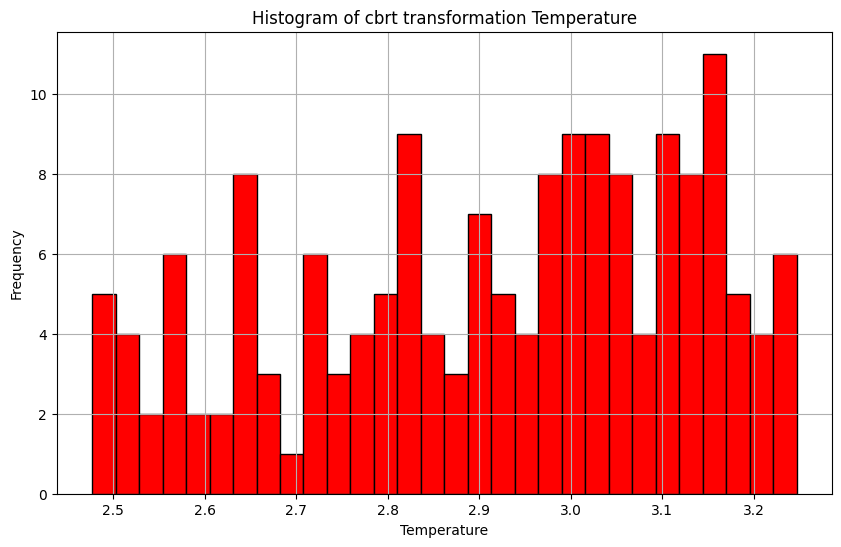

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.cbrt(X_train['Temperature']), bins=30, color='red', edgecolor='black')
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.title('Histogram of cbrt transformation ' + "Temperature")
plt.grid(True)
plt.show()

In [ ]:
X_train['Temperature'] = np.cbrt(X_train['Sunlight_Hours'])
X_test['Temperature'] = np.cbrt(X_test['Sunlight_Hours'])

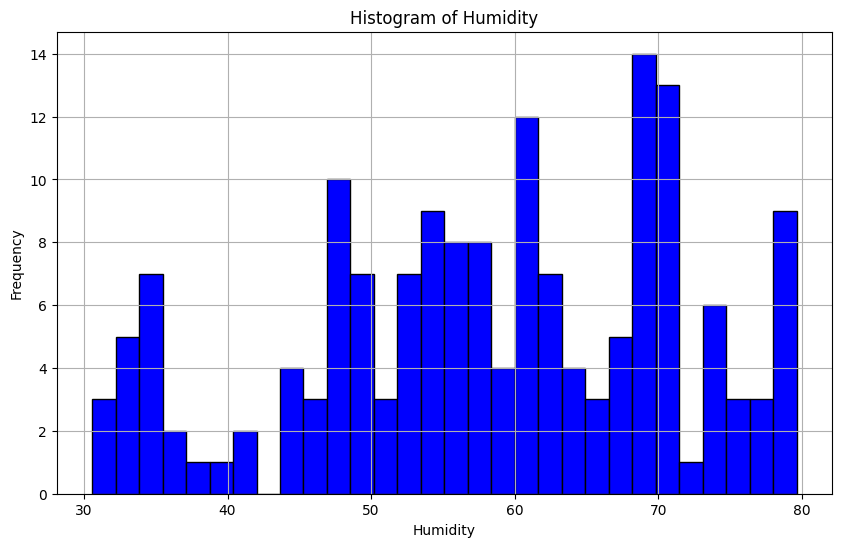

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train['Humidity'], bins=30, color='blue', edgecolor='black')
plt.xlabel("Humidity")
plt.ylabel('Frequency')
plt.title('Histogram of ' + "Humidity")
plt.grid(True)
plt.show()

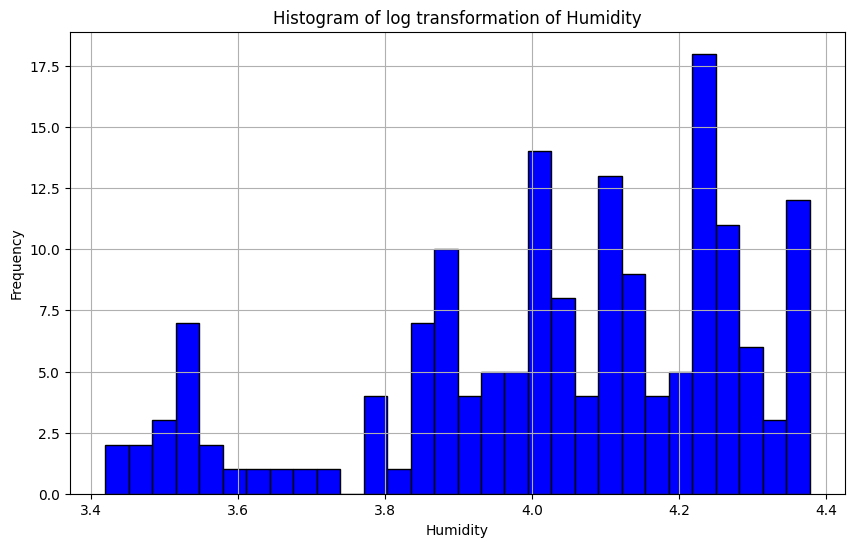

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(X_train['Humidity']), bins=30, color='blue', edgecolor='black')
plt.xlabel("Humidity")
plt.ylabel('Frequency')
plt.title('Histogram of log transformation of ' + "Humidity")
plt.grid(True)
plt.show()

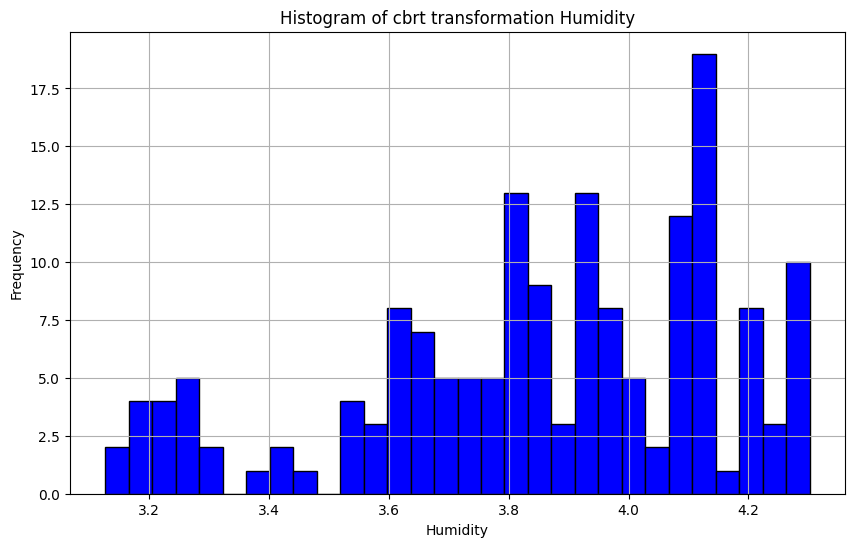

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.cbrt(X_train['Humidity']), bins=30, color='blue', edgecolor='black')
plt.xlabel("Humidity")
plt.ylabel('Frequency')
plt.title('Histogram of cbrt transformation ' + "Humidity")
plt.grid(True)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train['Temperature'] = scaler.fit_transform(X_train[['Temperature']])
X_test['Temperature'] = scaler.transform(X_test[['Temperature']])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.61      0.69      0.65        16

    accuracy                           0.59        29
   macro avg       0.58      0.57      0.57        29
weighted avg       0.58      0.59      0.58        29



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state=0)
logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.54      0.44      0.48        16

    accuracy                           0.48        29
   macro avg       0.49      0.49      0.48        29
weighted avg       0.49      0.48      0.48        29



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.62      0.81      0.70        16

    accuracy                           0.62        29
   macro avg       0.62      0.60      0.59        29
weighted avg       0.62      0.62      0.60        29



In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.67      0.62      0.65        16

    accuracy                           0.62        29
   macro avg       0.62      0.62      0.62        29
weighted avg       0.62      0.62      0.62        29



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=72)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.75      0.94      0.83        16

    accuracy                           0.79        29
   macro avg       0.82      0.78      0.78        29
weighted avg       0.81      0.79      0.79        29



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.38      0.46      0.41        13
           1       0.46      0.38      0.41        16

    accuracy                           0.41        29
   macro avg       0.42      0.42      0.41        29
weighted avg       0.42      0.41      0.41        29



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Extra Trees Classifier:")
print(classification_report(y_test, y_pred))

Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.67      0.62      0.65        16

    accuracy                           0.62        29
   macro avg       0.62      0.62      0.62        29
weighted avg       0.62      0.62      0.62        29

